<font color='#f6f6f6'>█████████████████████████████████████████████████████████████████████████████████████</font>

### Átomo de hidrogênio - Função de onda e visualização da densidade eletrônica

*Modelagem e visualização de funções de onda de átomos de hidrogênio e densidade de probabilidade de elétrons.*

- Autor: [@Sebastian Mag.](https://github.com/ssebastianmag) | Agosto 2023
- Tradutor: [@JuaoSea](https://github.com/JuaoSea) | Fevereiro 2025
- [Repositório GitHub - Original](https://github.com/ssebastianmag/hydrogen-wavefunctions)
- [Repositório GitHub - Traduzido](https://github.com/JuaoSea/hydrogen-wavefunctions-portuguese)
- [Versão anotada com comentários estendidos](https://github.com/JuaoSea/hydrogen-wavefunctions-portuguese/blob/main/main.py)

#### Requisitos 

In [4]:
from scipy.constants import physical_constants
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np

In [5]:
print('Matplotlib', matplotlib.__version__)
print('SciPy', scipy.__version__)
print('Seaborn', sns.__version__)
print('NumPy', np.__version__)

Matplotlib 3.10.0
SciPy 1.14.1
Seaborn 0.13.2
NumPy 1.26.4


<font color='#f6f6f6'>█████████████████████████████████████████████████████████████████████████████████████</font>

#### Função radial normalizada

A função radial descreve o comportamento do elétron como uma função da distância $r$ do núcleo, fornecendo um meio de visualizar a densidade de nuvens de elétrons em diferentes distâncias do núcleo.

### $R_{n \ell}(r) = \sqrt{\left( \frac{2}{n a_0} \right)^3 \frac{(n-\ell-1)!}{2n(n+\ell)!}} e^{-\frac{r}{n a_0}} \left( \frac{2r}{n a_0} \right)^{\ell} L_{n-\ell-1}^{2\ell+1}\left(\frac{2r}{n a_0}\right)$

In [6]:
def radial_function(n, l, r, a0):
    """ Calcule a parte radial normalizada da função de onda usando
    Polinômios de Laguerre e um fator de decaimento exponencial.

    Argumentos:
    n (int): número quântico principal
    l (int): número quântico azimutal
    r (numpy.ndarray): coordenada radial
    a0 (float): raio de Bohr
    Retorna:
    numpy.ndarray: componente radial da função de onda
    """

    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)

    constant_factor = np.sqrt(
        ((2 / n * a0) ** 3 * (sp.factorial(n - l - 1))) /
        (2 * n * (sp.factorial(n + l)))
    )
    return constant_factor * np.exp(-p / 2) * (p ** l) * laguerre(p)

<font color='#f6f6f6'>█████████████████████████████████████████████████████████████████████████████████████</font>

#### Função Angular Normalizada

A função angular é descrita por harmônicos esféricos e é uma função do ângulo polar $\theta$ e do ângulo azimutal $\varphi$. A função angular fornece a forma e a orientação dos orbitais atômicos.

### $Y_{\ell}^{m}(\theta, \varphi) = (-1)^m \sqrt{\frac{(2\ell+1)}{4\pi}\frac{(\ell-m)!}{(\ell+m)!}} P_{\ell}^{m}(\cos\theta) e^{im\varphi}$

In [7]:
def angular_function(m, l, theta, phi):
    """ Calcule a parte radial normalizada da função de onda usando
    Polinômios de Laguerre e um fator de decaimento exponencial.

    Argumentos:
    n (int): número quântico principal
    l (int): número quântico azimutal
    r (numpy.ndarray): coordenada radial
    a0 (float): raio de Bohr
    Retorna:
    numpy.ndarray: componente radial da função de onda
    """

    legendre = sp.lpmv(m, l, np.cos(theta))

    constant_factor = ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * sp.factorial(l - np.abs(m))) /
        (4 * np.pi * sp.factorial(l + np.abs(m)))
    )
    return constant_factor * legendre * np.real(np.exp(1.j * m * phi))

<font color='#f6f6f6'>█████████████████████████████████████████████████████████████████████████████████████</font>

#### Normalized Wavefunction

The total wavefunction for the hydrogen atom is the product of the radial and angular components.

### $\psi_{n \ell m}(r, \theta, \varphi) = R_{n \ell}(r) Y_{\ell}^{m}(\theta, \varphi)$

In [8]:
def compute_wavefunction(n, l, m, a0_scale_factor):
    """ Calcule a parte radial normalizada da função de onda usando
    Polinômios de Laguerre e um fator de decaimento exponencial.

    Argumentos:
    n (int): número quântico principal
    l (int): número quântico azimutal
    r (numpy.ndarray): coordenada radial
    a0 (float): raio de Bohr
    Retorna:
    numpy.ndarray: componente radial da função de onda
    """

    # Dimensione o raio de Bohr para uma visualização eficaz
    a0 = a0_scale_factor * physical_constants['Bohr radius'][0] * 1e+12

    # Grade x-y para representar a distribuição espacial dos elétrons
    grid_extent = 480
    grid_resolution = 680
    x = y = np.linspace(-grid_extent, grid_extent, grid_resolution)
    x, y = np.meshgrid(x, y)

    # Use epsilon para evitar divisão por zero durante cálculos de ângulos
    eps = np.finfo(float).eps

    # Ψnlm(r,θ,φ) = Rnl(r).Ylm(θ,φ)
    psi = radial_function(
        n, l, np.sqrt((x ** 2 + y ** 2)), a0
    ) * angular_function(
        m, l, np.arctan(x / (y + eps)), 0
    )
    return psi

<font color='#f6f6f6'>█████████████████████████████████████████████████████████████████████████████████████</font>

#### Densidade de Probabilidade | Densidade Eletrônica


Quantifica as probabilidades de encontrar uma partícula, como um elétron, em um ponto específico no espaço.

### $|\psi_{n \ell m}|^2$

In [9]:
def compute_probability_density(psi):
    """ Calcula a densidade de probabilidade de uma dada função de onda.
    Argumentos:
    psi (numpy.ndarray): função de onda
    Retorna:
    numpy.ndarray: densidade de probabilidade da função de onda
    """
    return np.abs(psi) ** 2

É crucial que toda a função de onda seja normalizada. Isso significa que ao integrar $|\psi_{n \ell m}|^2$ sobre todo o espaço, o resultado deve ser 1, significando que o elétron deve ser encontrado em algum lugar no espaço.

<font color='#f6f6f6'>█████████████████████████████████████████████████████████████████████████████████████</font>

#### Visualização da densidade de probabilidade da função de onda

In [10]:
def plot_wf_probability_density(n, l, m, a0_scale_factor, dark_theme=False, colormap='rocket'):
    """ Plota a densidade de probabilidade da função de onda do átomo de hidrogênio
    para um dado estado quântico (n,l,m).

    Argumentos:
    n (int): número quântico principal, determina o nível de energia e o tamanho do orbital
    l (int): número quântico azimutal, define a forma do orbital
    m (int): número quântico magnético, define a orientação do orbital
    a0_scale_factor (float): fator de escala do raio de Bohr
    dark_theme (bool): se True, usa um fundo escuro para o gráfico, padrão para False
    colormap (str): mapa de cores do gráfico Seaborn, padrão para 'rocket'
    """

    # Validação de números quânticos
    if not isinstance(n, int) or n < 1:
        raise ValueError('n should be an integer satisfying the condition: n >= 1')
    if not isinstance(l, int) or not (0 <= l < n):
        raise ValueError('l should be an integer satisfying the condition: 0 <= l < n')
    if not isinstance(m, int) or not (-l <= m <= l):
        raise ValueError('m should be an integer satisfying the condition: -l <= m <= l')

    # Validação de Colormap 
    try:
        sns.color_palette(colormap)
    except ValueError:
        raise ValueError(f'{colormap} is not a recognized Seaborn colormap.')

    # Configure plot aesthetics using matplotlib rcParams settings
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['xtick.major.width'] = 4
    plt.rcParams['ytick.major.width'] = 4
    plt.rcParams['xtick.major.size'] = 15
    plt.rcParams['ytick.major.size'] = 15
    plt.rcParams['xtick.labelsize'] = 30
    plt.rcParams['ytick.labelsize'] = 30
    plt.rcParams['axes.linewidth'] = 4

    fig, ax = plt.subplots(figsize=(16, 16.5))
    plt.subplots_adjust(top=0.82)
    plt.subplots_adjust(right=0.905)
    plt.subplots_adjust(left=-0.1)

    # Calcular e visualizar a densidade de probabilidade da função de onda
    psi = compute_wavefunction(n, l, m, a0_scale_factor)
    prob_density = compute_probability_density(psi)
    im = ax.imshow(np.sqrt(prob_density), cmap=sns.color_palette(colormap, as_cmap=True))

    cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
    cbar.set_ticks([])

    # Aplicar parâmetros de tema escuro
    if dark_theme:
        theme = 'dt'
        background_color = sorted(
            sns.color_palette(colormap, n_colors=100),
            key=lambda color: 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2]
        )[0]
        plt.rcParams['text.color'] = '#dfdfdf'
        title_color = '#dfdfdf'
        fig.patch.set_facecolor(background_color)
        cbar.outline.set_visible(False)
        ax.tick_params(axis='x', colors='#c4c4c4')
        ax.tick_params(axis='y', colors='#c4c4c4')
        for spine in ax.spines.values():
            spine.set_color('#c4c4c4')

    else:  # Aplicar parâmetros de tema claro
        theme = 'lt'
        plt.rcParams['text.color'] = '#000000'
        title_color = '#000000'
        ax.tick_params(axis='x', colors='#000000')
        ax.tick_params(axis='y', colors='#000000')

    ax.set_title('Hydrogen Atom - Wavefunction Electron Density', pad=130, fontsize=44, loc='left', color=title_color)
    ax.text(0, 722, (
        r'$|\psi_{n \ell m}(r, \theta, \varphi)|^{2} ='
        r' |R_{n\ell}(r) Y_{\ell}^{m}(\theta, \varphi)|^2$'
    ), fontsize=36)
    ax.text(30, 615, r'$({0}, {1}, {2})$'.format(n, l, m), color='#dfdfdf', fontsize=42)
    ax.text(770, 140, 'Electron probability distribution', rotation='vertical', fontsize=40)
    ax.text(705, 700, 'Higher\nprobability', fontsize=24)
    ax.text(705, -60, 'Lower\nprobability', fontsize=24)
    ax.text(775, 590, '+', fontsize=34)
    ax.text(769, 82, '−', fontsize=34, rotation='vertical')
    ax.invert_yaxis()

    # Salvar e exibir o gráfico ↓
    # plt.savefig(f'({n},{l},{m})[{theme}].png')
    plt.show()

- Ao tirar a raiz quadrada da densidade de probabilidade, reduzimos a faixa dinâmica da visualização, espalhando os valores e tornando a presença do elétron em regiões de baixa e média probabilidade mais distinguível

<font color='#f6f6f6'>█████████████████████████████████████████████████████████████████████████████████████</font>

### Exemplo de densidades de probabilidade para vários estados quânticos $({n, l, m})$

Áreas sombreadas claras nas seções transversais orbitais representam uma alta probabilidade de uma partícula estar presente naquela região. Por outro lado, regiões mais escuras ou sem sombreamento indicam áreas onde o elétron tem menos probabilidade de ser encontrado.

In [11]:
plt.rcParams['figure.dpi'] = 38

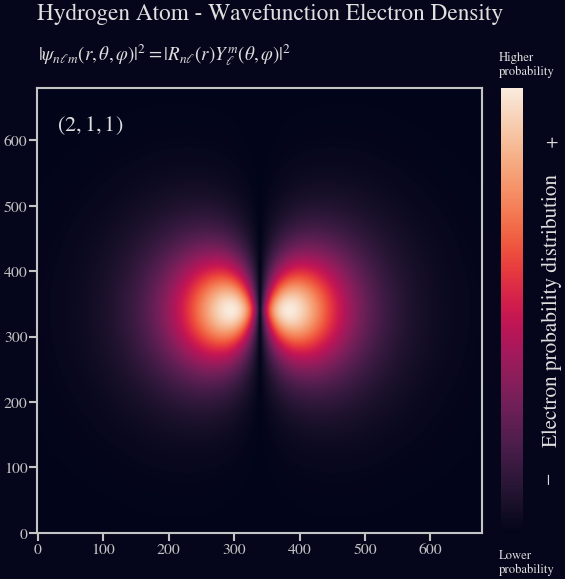

In [12]:
plot_wf_probability_density(2, 1, 1, 0.6, True)

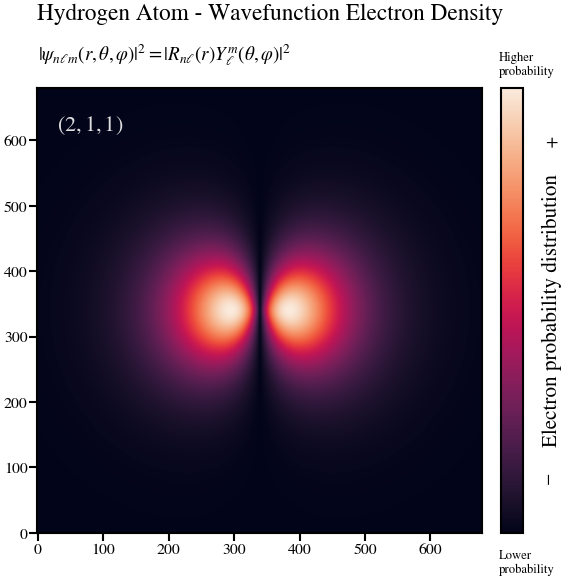

In [13]:
plot_wf_probability_density(2, 1, 1, 0.6)

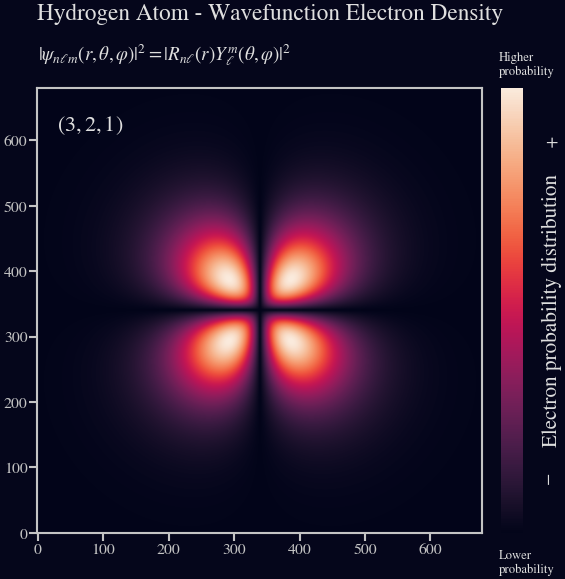

In [14]:
plot_wf_probability_density(3, 2, 1, 0.3, True)

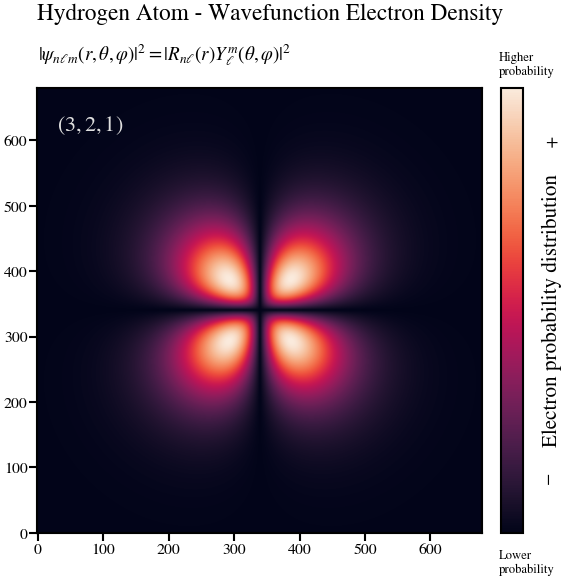

In [15]:
plot_wf_probability_density(3, 2, 1, 0.3)

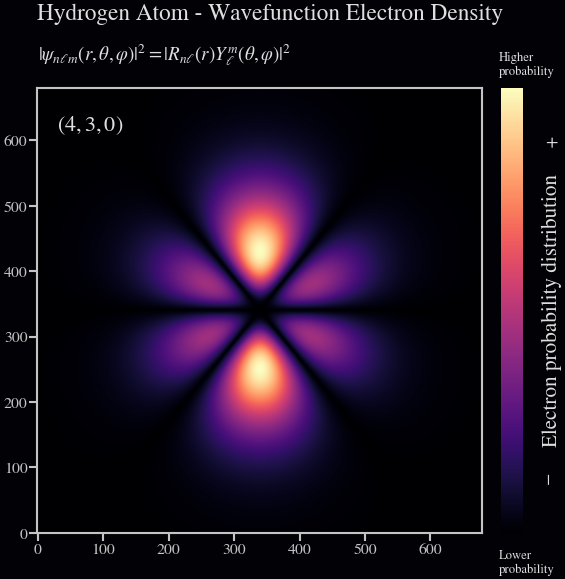

In [16]:
plot_wf_probability_density(4, 3, 0, 0.2, dark_theme=True, colormap='magma')

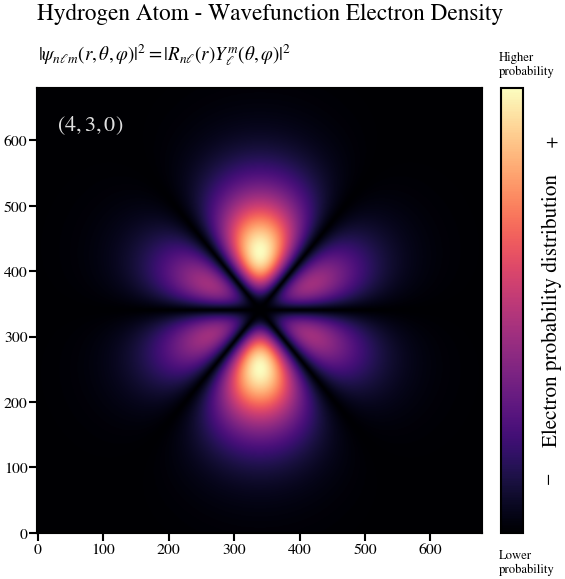

In [17]:
plot_wf_probability_density(4, 3, 0, 0.2, colormap='magma')

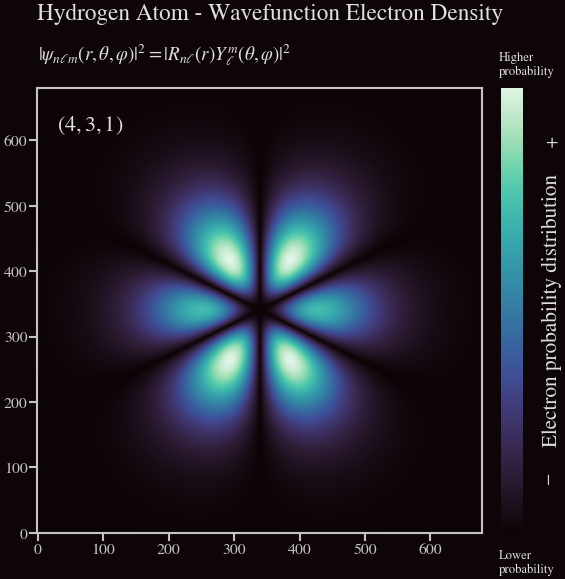

In [18]:
plot_wf_probability_density(4, 3, 1, 0.2, dark_theme=True, colormap='mako')

Ao examinarmos os gráficos de densidade de elétrons correspondentes aos números quânticos acima, notamos
que com o aumento do número quântico principal $n$, a complexidade da função de onda cresce
Especificamente:
- O número de nós (regiões onde a densidade de probabilidade é zero) aumenta.
- A distribuição espacial do elétron se expande, cobrindo regiões maiores ao redor do núcleo.
- A forma geral do orbital atômico se torna mais intrincada e detalhada.

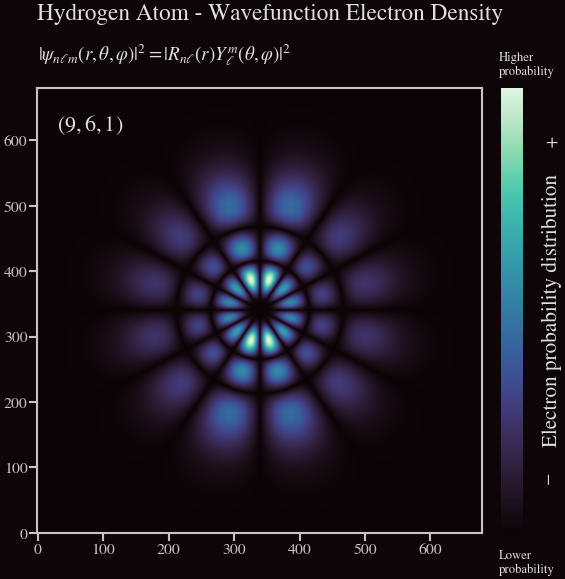

In [19]:
plot_wf_probability_density(9, 6, 1, 0.04, True, colormap='mako')

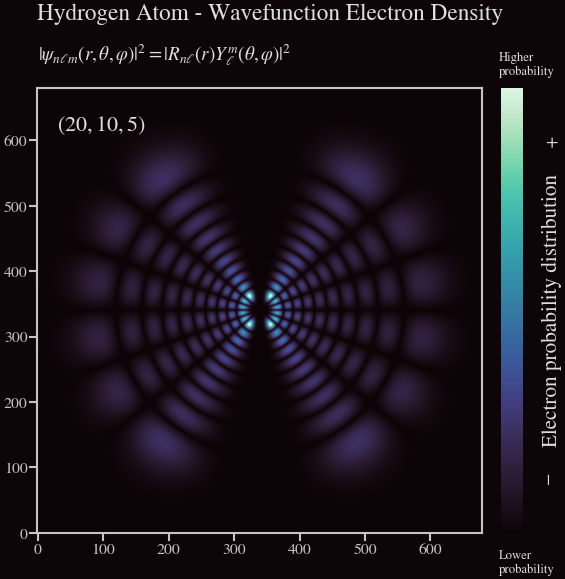

In [20]:
plot_wf_probability_density(20, 10, 5, 0.01, True, colormap='mako')

Para números quânticos extremamente altos, os seguintes efeitos podem ser observados:
- A complexidade aumenta ainda mais, resultando em vários nós e padrões intrincados.
- Avaliar a função de onda em um vasto domínio espacial se torna computacionalmente intensivo.
- A visualização pode se tornar confusa, dificultando o discernimento de detalhes ou características específicas.